# CAPSTONE PROJECT
**Robust yield prediction of various farm processing units**

## Problem Description:

A new fast food chain is seeing rapid expansion over the past couple of years. They
are now trying to optimize their supply chain to ensure that there are no shortages of
ingredients. For this, they’ve tasked their data science team to come up with a model that could predict the output of each food processing farm over the next few years.
These predictions could further increase the efficiency of their current supply chain
management systems. 

### About Data:

There are 5 datasets along with a sample submission file provided to you in this
competition. The datasets are named as follows:

● **‘train_data.csv’:**

○ date: The timestamp at which the yield of the food processing farm
was measured

○ farm_id: The farm identifier that recognizes the farm food processing
plant

○ ingredient_type: The type of ingredient being produced

○ yield: The yield of the plant in tonnes

● **‘farm_data.csv’:**

○ farm_id: The farm identifier that recognizes the farm food processing
plant

○ founding_year: They year when the operations commenced on the
farm and food processing plant.

○ num_processing_plants: The number of processing plants present
on the farm

○ farm_area: The area of the farm in square meters

○ farming_company: The company that owns the farms

○ deidentified_location: The location at which the farm is present

● **‘train_weather.csv’:**
○ For each location where the farms are present, the weather data is
also provided by timestamp

● **‘test_data.csv’** and **‘test_weather.csv’** are also provided to you

### Objectives:

In this hackathon, you are expected to:
1. Explore the data and engineer new features
2. Predict the yield for each farm during the given timestamps
3. Given the forecasted demand for the next few months for a particular ingredient, device a strategy to source it

### Creating a strategy to source ‘ing_w’ ingredient type


Below is the forecasted demand for the next year for ‘ing_w’, using the model you
built, create a sourcing strategy for ‘ing_w’ such that the following conditions hold:

● You should source the ingredient at least a month before

● The ingredient has a long shelf life, capable of being used for at least 8
months once stocked


| month | demand |
| --- | --- |
| 1 | 90430481 |
| 2 | 75344853 |
| 3 | 91917783 |
| 4 | 82591524 |
| 5 | 87419669 |
| 6 | 297500000 |
| 7 | 198900000 |
|8 | 97367031 |
| 9 | 91049286 |
| 10 | 91755300 |
| 11 | 86533266 |
| 12 | 88514610 |


# TIME SERIES:

A time series is a sequence of data points collected at regularly spaced intervals over time. Time series data is often used in fields such as economics, finance, and climate research to analyze trends, patterns, and forecast future events. Examples of time series data include stock prices, sales data, weather data, and population growth data. Time series analysis often involves statistical methods such as trend analysis, seasonality analysis, and forecasting.

**Components of Time Series** :

A Time Series consists of the following components :


**Trend** : Long term direction of the data.

E.g : Year on year rising temperature of the Earth due to Global Warming.


**Seasonality** : Short term repetitve patterns of the data due to the weather seasons.

E.g : Sale of sweaters specifically in the winter season.


**Cyclic Variations** : Short term repetitive patterns of the data over a period of 1 year.

E.g : It usually consists of the Business Quarters i.e Q1, Q2, Q3 & Q4.


**Irregularities** : Random and unforseen fluctuations in the data.

E.g : Occurrences of Earthquakes or Floods, etc.

To make this concept more clear here is a visual interpretation of the various components of the Time Series. You can view the original diagram with its context, here.

<img src="variations-of-time-series.jpg" alt="Image Title" width="400" height="300">

[Source] (https://www.atap.gov.au/tools-techniques/travel-demand-modelling/6-forecasting-evaluation)

**PROCEDURE TO BE FOLLOWED FOR YEILD PREDICTION**

<img src="graph of prediction.webp" alt="procedure to yeild prediction" width="400" height="300">

[SOURCE] (https://www.nature.com/articles/s43016-021-00365-y)

The plots can be used in various ways to analyze and visualize time series data. Here's a brief explanation for each of them:

Line charts: Line charts are used to show the trends in the data over time. They can be used to visualize how the values change over a period of time, and to identify trends such as upward or downward movements.

Bar charts: Bar charts are used to compare the values of different categories at a single point in time. For example, you can use a bar chart to compare the sales of different products for a given month.

Area charts: Area charts are similar to line charts but with the area below the line filled in. They are used to show the cumulative total over time, and to visualize how the values change over time.

Stacked area charts: Stacked area charts are similar to area charts but with multiple areas stacked on top of each other. They are used to show the composition of the total over time, and to visualize how different parts contribute to the overall trend.

Scatter plots: Scatter plots are used to show the relationship between two variables at different points in time. They can be used to identify correlations and patterns between the variables, and to visualize the distribution of the data.

Box plots: Box plots are used to show the distribution of values at different points in time. They can be used to identify outliers and to get a general idea of the spread of the data.

Candle stick charts: Candle stick charts are used in finance to show the high, low, opening, and closing prices of a stock over a period of time. They are used to visualize the price movement of a stock and to identify patterns such as bullish or bearish trends.

In [1]:
import pandas as pd
import numpy as np
#importing msno for having a very good view of visualizing missing data in dataset
!pip install missingno
import missingno as msno
# impporting tqdm for adding progress bars to Python code
from tqdm import tqdm
#importing warnings to avoid unnecesaary warnings due to version change
import warnings
warnings.filterwarnings('ignore')
# importing labelencoder
from sklearn.preprocessing import OneHotEncoder
#importing for visualization process
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#reading train csv file using pandas
train=pd.read_csv('train_data.csv')

In [3]:
train

,date,farm_id,ingredient_type,yield
0,2016-01-01 00:00:00,fid_110884,ing_w,0.000
1,2016-01-01 00:00:00,fid_90053,ing_w,0.000
2,2016-01-01 00:00:00,fid_17537,ing_w,0.000
3,2016-01-01 00:00:00,fid_110392,ing_w,0.000
4,2016-01-01 00:00:00,fid_62402,ing_w,0.000
...,...,...,...,...
20216095,2016-12-31 23:00:00,fid_41664,ing_w,8.750
20216096,2016-12-31 23:00:00,fid_14529,ing_w,4.825
20216097,2016-12-31 23:00:00,fid_46454,ing_w,0.000
20216098,2016-12-31 23:00:00,fid_24103,ing_w,159.575


In [4]:
#checking the data types of the train data
train.dtypes

date                object
farm_id             object
ingredient_type     object
yield              float64
dtype: object

In [5]:
#checking the null values of train data
train.isnull().sum()

date               0
farm_id            0
ingredient_type    0
yield              0
dtype: int64

In [6]:
# reading farm.csv file
farm=pd.read_csv('farm_data-1646897931981.csv')

In [7]:
farm

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369
...,...,...,...,...,...,...
1444,fid_41664,1914.0,NaN,1822.663957,Sanderson Farms,location 5150
1445,fid_14529,NaN,NaN,399.297094,Obery Farms,location 5150
1446,fid_46454,1997.0,NaN,1046.552295,Sanderson Farms,location 5150
1447,fid_24103,2001.0,NaN,2766.186825,Dole Food Company,location 5150


In [8]:
# merging the train and farm data with farm_id
train_farm = pd.merge(train,farm,on='farm_id')

In [9]:
train_farm

,date,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,2016-01-01 00:00:00,fid_110884,ing_w,0.00,2008.0,NaN,690.455096,Obery Farms,location 7369
1,2016-01-01 01:00:00,fid_110884,ing_w,0.00,2008.0,NaN,690.455096,Obery Farms,location 7369
2,2016-01-01 02:00:00,fid_110884,ing_w,0.00,2008.0,NaN,690.455096,Obery Farms,location 7369
3,2016-01-01 03:00:00,fid_110884,ing_w,0.00,2008.0,NaN,690.455096,Obery Farms,location 7369
4,2016-01-01 04:00:00,fid_110884,ing_w,0.00,2008.0,NaN,690.455096,Obery Farms,location 7369
...,...,...,...,...,...,...,...,...,...
20602894,2016-12-31 19:00:00,fid_19864,ing_w,43.66,1962.0,NaN,4598.698500,Obery Farms,location 5290
20602895,2016-12-31 20:00:00,fid_19864,ing_w,43.64,1962.0,NaN,4598.698500,Obery Farms,location 5290
20602896,2016-12-31 21:00:00,fid_19864,ing_w,43.89,1962.0,NaN,4598.698500,Obery Farms,location 5290
20602897,2016-12-31 22:00:00,fid_19864,ing_w,44.37,1962.0,NaN,4598.698500,Obery Farms,location 5290


In [10]:
#checking the null values of both farm and train
train_farm.isnull().sum()

date                                 0
farm_id                              0
ingredient_type                      0
yield                                0
operations_commencing_year    12351033
num_processing_plants         16995234
farm_area                            0
farming_company                      0
deidentified_location                0
dtype: int64

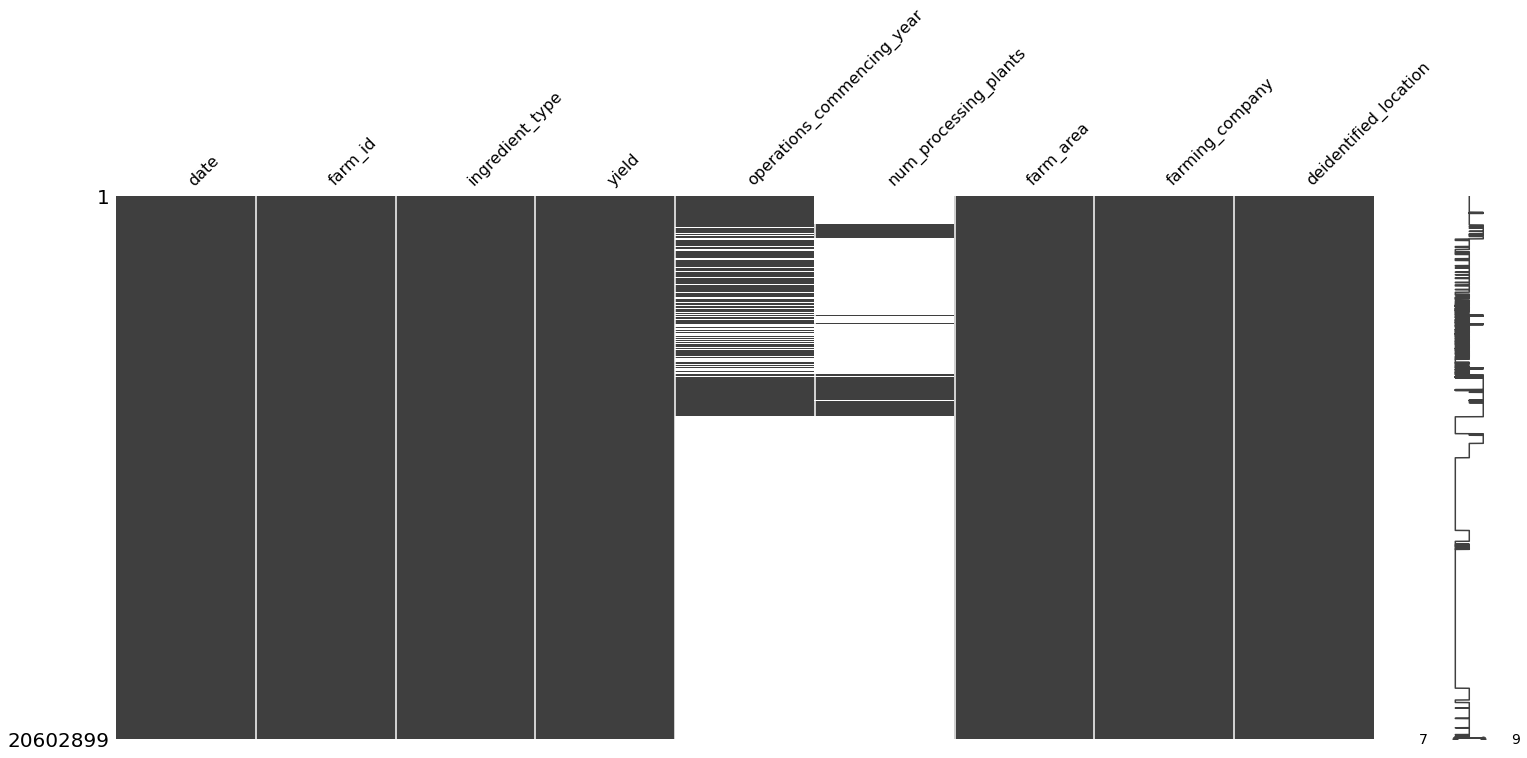

In [11]:
#visualizing the missing values
msno.matrix(train_farm);

With **missingno**, we can create a variety of visualizations, including bar charts, heatmaps, and matrices, to show the distribution of missing data in your dataset. These visualizations can help you identify which columns or rows have the most missing data, whether the missing data is randomly distributed or follows a specific pattern, and how the missing data relates to other variables in the dataset.

In [12]:
# Storing null values in train,then printing columns with more than 0 null values
null=train_farm.isnull().sum().sort_values(ascending=False)
null[null>0]


num_processing_plants         16995234
operations_commencing_year    12351033
dtype: int64

In [13]:
# Percentage of missing values in train data
total_rows=20602899
miss_per=pd.DataFrame(null[null>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/total_rows)*100).round(2)
miss_per

,Missing,Missing%
num_processing_plants,16995234,82.49
operations_commencing_year,12351033,59.95


as we have seen more than 50% of data contains NaN values so we cannot fill the missing values with the less data if the data is 25% is missing we can impute with the remaining 75% data but if the data is 50% lost how can we impute the data so i just removing the two rows **num_processing_plants** and **operations_commencing_year** from the data

In [14]:
# dropping the null values
train_farm.drop('operations_commencing_year',axis=1,inplace=True)
train_farm.drop('num_processing_plants',axis=1,inplace=True)


In [15]:
train_farm

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location
0,2016-01-01 00:00:00,fid_110884,ing_w,0.00,690.455096,Obery Farms,location 7369
1,2016-01-01 01:00:00,fid_110884,ing_w,0.00,690.455096,Obery Farms,location 7369
2,2016-01-01 02:00:00,fid_110884,ing_w,0.00,690.455096,Obery Farms,location 7369
3,2016-01-01 03:00:00,fid_110884,ing_w,0.00,690.455096,Obery Farms,location 7369
4,2016-01-01 04:00:00,fid_110884,ing_w,0.00,690.455096,Obery Farms,location 7369
...,...,...,...,...,...,...,...
20602894,2016-12-31 19:00:00,fid_19864,ing_w,43.66,4598.698500,Obery Farms,location 5290
20602895,2016-12-31 20:00:00,fid_19864,ing_w,43.64,4598.698500,Obery Farms,location 5290
20602896,2016-12-31 21:00:00,fid_19864,ing_w,43.89,4598.698500,Obery Farms,location 5290
20602897,2016-12-31 22:00:00,fid_19864,ing_w,44.37,4598.698500,Obery Farms,location 5290


In [16]:
#reading weather.csv file
weather = pd.read_csv('train_weather-1646897968670.csv')

In [17]:
weather

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,location 7369,24.4,NaN,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,2016-12-31 19:00:00,location 5150,3.0,NaN,180.0,-8.0,NaN,NaN,5.7
139769,2016-12-31 20:00:00,location 5150,2.8,2.0,180.0,-8.9,1007.4,NaN,7.7
139770,2016-12-31 21:00:00,location 5150,2.8,NaN,180.0,-7.2,1007.5,NaN,5.1
139771,2016-12-31 22:00:00,location 5150,2.2,NaN,170.0,-6.7,1008.0,NaN,4.6


In [18]:
#just to ensure that all the train dataset has a common name for timestamp as date, lets change the name of timestamp as date.
weather.rename(columns={'timestamp':'date'},inplace=True)

In [19]:
#checking the null values to the weather dataset
weather.isnull().sum()

date                         0
deidentified_location        0
temp_obs                    55
cloudiness               69173
wind_direction            6268
dew_temp                   113
pressure_sea_level       10618
precipitation            50289
wind_speed                 304
dtype: int64

In [20]:
# Storing null values in weather,then printing columns with more than 0 null values
null1=weather.isnull().sum().sort_values(ascending=False)
null[null>0]
# Percentage of missing values in train data
total_rows=139773
miss_per=pd.DataFrame(null1[null1>0])
miss_per.columns=['Missing']
miss_per['Missing%']=((miss_per['Missing']/total_rows)*100).round(2)
miss_per

,Missing,Missing%
cloudiness,69173,49.49
precipitation,50289,35.98
pressure_sea_level,10618,7.60
wind_direction,6268,4.48
wind_speed,304,0.22
dew_temp,113,0.08
temp_obs,55,0.04


we cannot impute the missings if they are more than 25% so we are dropping cloudiness and precipitation columns from thr weather data

In [21]:
#dropping the cloudiness and precipitation
weather.drop('cloudiness',axis=1,inplace=True)
weather.drop('precipitation',axis=1,inplace=True)

In [22]:
weather

,date,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,0.0,20.0,1019.7,0.0
1,2016-01-01 01:00:00,location 7369,24.4,70.0,21.1,1020.2,1.5
2,2016-01-01 02:00:00,location 7369,22.8,0.0,21.1,1020.2,0.0
3,2016-01-01 03:00:00,location 7369,21.1,0.0,20.6,1020.1,0.0
4,2016-01-01 04:00:00,location 7369,20.0,250.0,20.0,1020.0,2.6
...,...,...,...,...,...,...,...
139768,2016-12-31 19:00:00,location 5150,3.0,180.0,-8.0,NaN,5.7
139769,2016-12-31 20:00:00,location 5150,2.8,180.0,-8.9,1007.4,7.7
139770,2016-12-31 21:00:00,location 5150,2.8,180.0,-7.2,1007.5,5.1
139771,2016-12-31 22:00:00,location 5150,2.2,170.0,-6.7,1008.0,4.6


<AxesSubplot:>

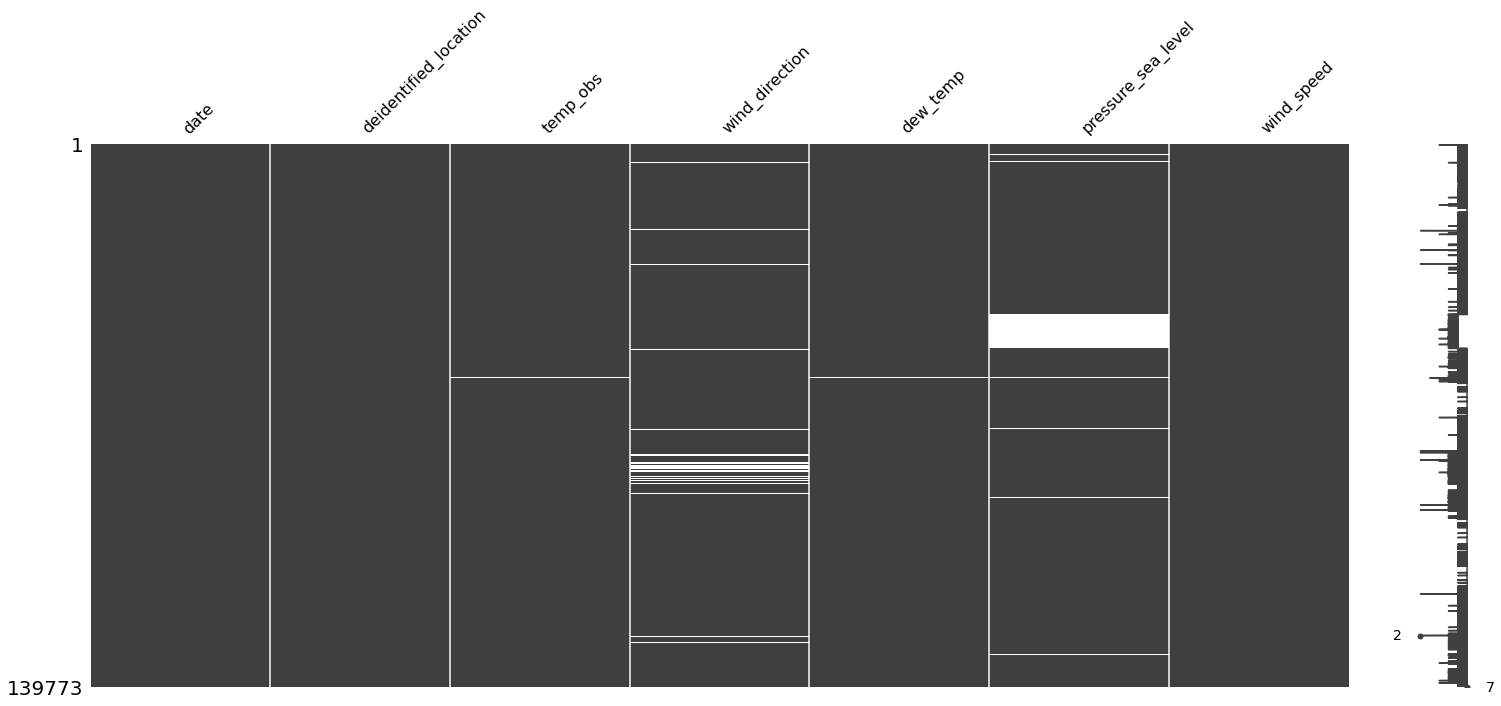

In [23]:
#visualizing the missing values
msno.matrix(weather)

## imputing missing values

#### pressure_sea_level

In [24]:
#checking the discription of pressure_sea_level for weather
weather['pressure_sea_level'].describe()

count    129155.000000
mean       1016.158038
std           7.629684
min         968.200000
25%        1011.800000
50%        1016.400000
75%        1020.800000
max        1045.500000
Name: pressure_sea_level, dtype: float64

In [25]:
# lets see how these values occur in this column
weather['pressure_sea_level'].sample(20)

97367     1023.3
132677       NaN
44703        NaN
80107        NaN
26699      998.0
124947    1020.0
138966    1020.9
114742    1022.7
15637     1014.9
87628     1033.6
488       1022.9
55778     1022.8
51594        NaN
990       1024.4
65191     1015.0
57184     1009.8
37549     1018.8
115353    1003.0
131729    1020.3
48905        NaN
Name: pressure_sea_level, dtype: float64

In [26]:
#finding the modde of the pressure_sea_level
weather['pressure_sea_level'].mode()

0    1015.2
Name: pressure_sea_level, dtype: float64

In [27]:
#filling the missing values with fillna method
weather['pressure_sea_level'].fillna('1015.2',inplace=True)

#### wind_direction

In [28]:
# lets see how wind_direction values occur in this column
weather['wind_direction'].sample(20)

60621       0.0
55358     190.0
16239     350.0
83415     270.0
1382      340.0
75243     200.0
9736      260.0
16598     190.0
82769       NaN
16972     190.0
16646      40.0
116479    110.0
120713    100.0
123285    210.0
53552       NaN
35027     350.0
20078     260.0
85675       0.0
46573      40.0
134447    290.0
Name: wind_direction, dtype: float64

Text(0, 0.5, 'Count')

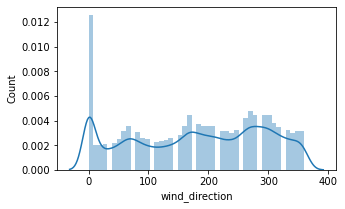

In [29]:
# Plotting univariate plot for wind direction
plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
sns.distplot(weather['wind_direction'])
plt.ylabel('Count')

Data is scattered vastly, it is not normally distributed we can't use mean value to fill missing records. We need to look at the data more closely.

In [30]:
#checking the desciption of wind_direction
weather['wind_direction'].describe()

count    133505.000000
mean        180.526632
std         111.523629
min           0.000000
25%          80.000000
50%         190.000000
75%         280.000000
max         360.000000
Name: wind_direction, dtype: float64

It would be better to fill it with mode value or by forward fill method

In [31]:
#imputing the missing values with 0 by fillna method
weather['wind_direction'].fillna(0,inplace=True)

#### wind_speed

In [32]:
##checking the discription of wind_speed for weather
weather['wind_speed'].describe()

count    139469.000000
mean          3.560527
std           2.335874
min           0.000000
25%           2.100000
50%           3.100000
75%           5.000000
max          19.000000
Name: wind_speed, dtype: float64

Text(0, 0.5, 'Count')

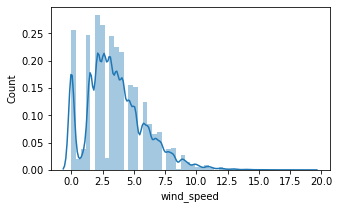

In [33]:
# Plotting univariate plot for wind_speed
plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
sns.distplot(weather['wind_speed'])
plt.ylabel('Count')

Data is scattered vastly, it is not normally distributed we can't use mean value to fill missing records. We need to look at the data more closely.

In [34]:
#checking the mode values in wind_speed
weather['wind_speed'].mode()

0    2.1
Name: wind_speed, dtype: float64

Text(0, 0.5, 'Count')

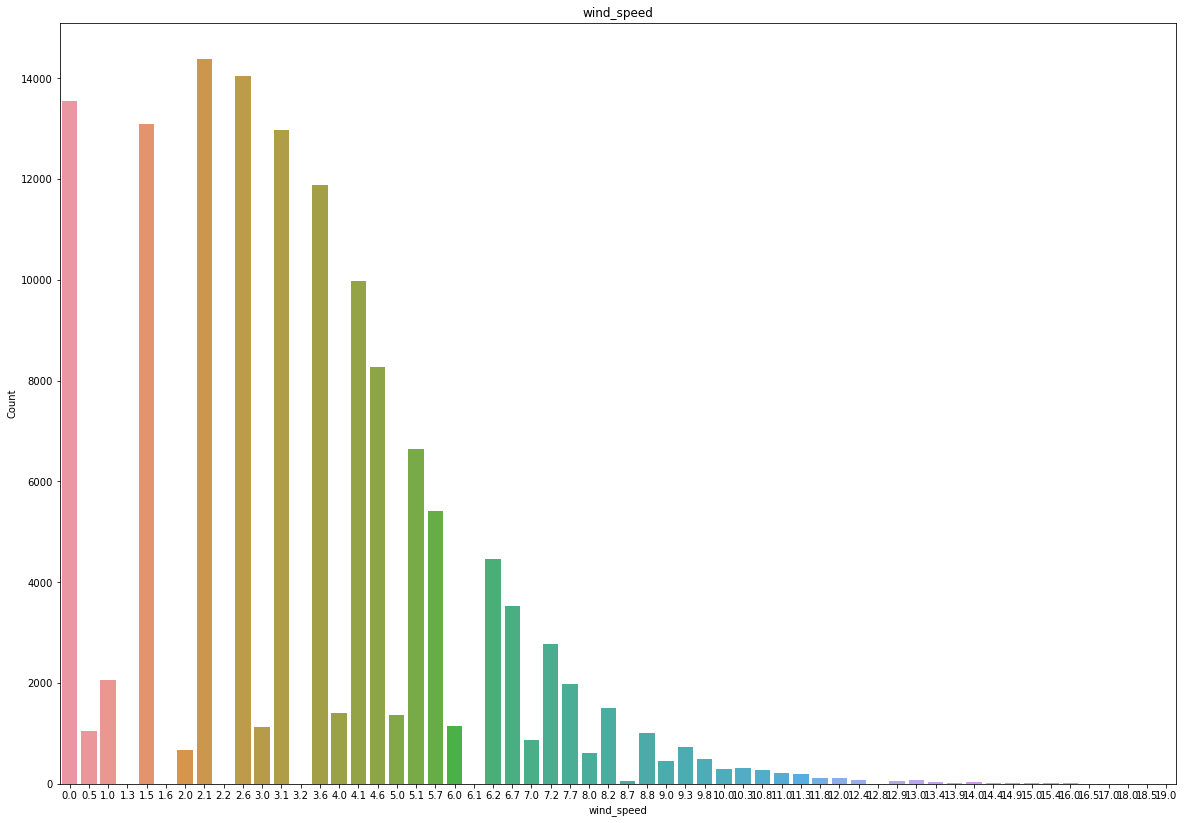

In [35]:
#plotting graph for checking the count
plt.figure(figsize=(44,14))
plt.subplot(1,2,1)
sns.countplot(weather['wind_speed'])
plt.title('wind_speed')
plt.ylabel('Count')

Data is scattered vastly, it is not normally distributed we can't use mean value to fill missing records. ans we cant find the highest value for fillna, we cant even find a most repeated value here, We need to look at the data more closely.

In [36]:
#checking the sample of wind_speed
weather['wind_speed'].sample(20)

35924     1.5
81444     2.6
113336    3.0
36593     2.6
27427     0.0
32225     4.1
120963    3.6
87534     2.1
35368     1.5
56769     2.1
99943     2.1
42092     6.7
65328     4.1
28618     9.3
114003    0.0
98952     2.6
5750      5.7
50554     7.2
7276      4.1
34030     2.6
Name: wind_speed, dtype: float64

its better to use ffill to impute the missing values as the next repated values are closer to eachother

In [37]:
#imputing the missing values with ffill method
weather['wind_speed'].fillna(method='ffill',inplace=True)

#### temp_obs

In [38]:
#observing the  value_counts of temp_obs
weather['temp_obs'].value_counts

<bound method IndexOpsMixin.value_counts of 0         25.0
1         24.4
2         22.8
3         21.1
4         20.0
          ... 
139768     3.0
139769     2.8
139770     2.8
139771     2.2
139772     1.7
Name: temp_obs, Length: 139773, dtype: float64>

as the data is continous we are just filling the missing values with ffill

In [39]:
#imputing missing values by ffill
weather['temp_obs'].fillna(method='ffill',inplace=True)

#### dew_temp

In [40]:
#checking the value counts
weather['dew_temp'].value_counts

<bound method IndexOpsMixin.value_counts of 0         20.0
1         21.1
2         21.1
3         20.6
4         20.0
          ... 
139768    -8.0
139769    -8.9
139770    -7.2
139771    -6.7
139772    -5.6
Name: dew_temp, Length: 139773, dtype: float64>

Text(0, 0.5, 'Count')

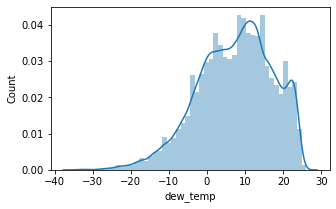

In [41]:
#plotting a univariate plot
plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
sns.distplot(weather['dew_temp'])
plt.ylabel('Count')

most of the data lies on 10 so replacing the missing data with 50%-10 and 50%-15

In [42]:
#checking the null values
weather['dew_temp'].isnull().sum()

113

In [43]:
#filling 50% of missing values with 10 and another 50% with 15
weather['dew_temp'].fillna('10',limit=56,inplace=True)
weather['dew_temp'].fillna('15',limit=57,inplace=True)

we imputed all the missing values in weather dataset

In [44]:
#checking the null values for verification
weather.isnull().sum()

date                     0
deidentified_location    0
temp_obs                 0
wind_direction           0
dew_temp                 0
pressure_sea_level       0
wind_speed               0
dtype: int64

In [45]:
#merging weather&train_farm data with deidentified_location and date
weather_train_farm = pd.merge(train_farm,weather, on=['deidentified_location','date'])

In [46]:
weather_train_farm

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed
0,2016-01-01 00:00:00,fid_110884,ing_w,0.000,690.455096,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.000,252.696160,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.000,499.446528,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.000,2200.407555,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.000,10833.140121,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20511527,2016-12-17 06:00:00,fid_117010,ing_x,0.000,11857.395696,Obery Farms,location 868,-17.1,60.0,-19.2,1022.7,2.6
20511528,2016-12-17 06:00:00,fid_117010,ing_z,246.516,11857.395696,Obery Farms,location 868,-17.1,60.0,-19.2,1022.7,2.6
20511529,2016-12-17 06:00:00,fid_74945,ing_w,92.000,7561.375170,Obery Farms,location 868,-17.1,60.0,-19.2,1022.7,2.6
20511530,2016-12-17 06:00:00,fid_74945,ing_x,0.000,7561.375170,Obery Farms,location 868,-17.1,60.0,-19.2,1022.7,2.6


In [47]:
#checking the null values
weather_train_farm.isnull().sum()

date                     0
farm_id                  0
ingredient_type          0
yield                    0
farm_area                0
farming_company          0
deidentified_location    0
temp_obs                 0
wind_direction           0
dew_temp                 0
pressure_sea_level       0
wind_speed               0
dtype: int64

In [48]:
#checking the dtypes
weather_train_farm.dtypes

date                      object
farm_id                   object
ingredient_type           object
yield                    float64
farm_area                float64
farming_company           object
deidentified_location     object
temp_obs                 float64
wind_direction           float64
dew_temp                  object
pressure_sea_level        object
wind_speed               float64
dtype: object

### FEATURE EXTRACTION

In [49]:
#convering values in to int
dew_temp = weather_train_farm['dew_temp'].values
dew_temp1 = dew_temp.astype(int)
temp_obs = weather_train_farm['temp_obs'].values
temp_obs1 = temp_obs.astype(int)

In [50]:
#formulae for relative humidity
Relative_humidity = 100 * (np.exp((17.625 * dew_temp1)/(243.04 + dew_temp1))/np.exp((17.625 * temp_obs1)/(243.04 + temp_obs1)))

In [51]:
# Create a new pandas Series with the same index as the DataFrame
Relative_humidity = pd.Series(Relative_humidity, index=weather_train_farm.index)

# Assign the Series to a new column in the DataFrame
weather_train_farm['Relative_humidity'] = Relative_humidity
weather_train_farm

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity
0,2016-01-01 00:00:00,fid_110884,ing_w,0.000,690.455096,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,0.0,73.802512
1,2016-01-01 00:00:00,fid_90053,ing_w,0.000,252.696160,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,0.0,73.802512
2,2016-01-01 00:00:00,fid_17537,ing_w,0.000,499.446528,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,0.0,73.802512
3,2016-01-01 00:00:00,fid_110392,ing_w,0.000,2200.407555,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,0.0,73.802512
4,2016-01-01 00:00:00,fid_62402,ing_w,0.000,10833.140121,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,0.0,73.802512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20511527,2016-12-17 06:00:00,fid_117010,ing_x,0.000,11857.395696,Obery Farms,location 868,-17.1,60.0,-19.2,1022.7,2.6,84.436447
20511528,2016-12-17 06:00:00,fid_117010,ing_z,246.516,11857.395696,Obery Farms,location 868,-17.1,60.0,-19.2,1022.7,2.6,84.436447
20511529,2016-12-17 06:00:00,fid_74945,ing_w,92.000,7561.375170,Obery Farms,location 868,-17.1,60.0,-19.2,1022.7,2.6,84.436447
20511530,2016-12-17 06:00:00,fid_74945,ing_x,0.000,7561.375170,Obery Farms,location 868,-17.1,60.0,-19.2,1022.7,2.6,84.436447


Here we extracted a new feature called relative humidity by using the following relation mentioned below:

Relative humidity is the ratio of the amount of moisture in the air to the maximum amount of moisture the air can hold at a given temperature. Dew point temperature is the temperature at which the air can no longer hold all of the water vapor it contains, and some of the water vapor condenses into liquid form (dew).

When the temperature of the air decreases, its ability to hold moisture also decreases. If the temperature decreases to the dew point temperature, the air will have reached its maximum capacity for holding moisture and any additional moisture will condense into dew.

So, the relative humidity of the air is directly connected to the temperature and dew point temperature. As the temperature decreases, the relative humidity increases, and as the temperature increases, the relative humidity decreases. When the temperature and dew point temperature are the same, the relative humidity is 100%.

we calculated RH by using the formulae:

Relative_humidity = 100 * (np.exp((17.625 * dew_temp1)/(243.04 + dew_temp1))/np.exp((17.625 * temp_obs1)/(243.04 + temp_obs1)))

In [52]:
# Understanding all columns
for col in weather_train_farm.select_dtypes(include='object').columns:
    print(col)
    print(weather_train_farm[col].unique())

date
['2016-01-01 00:00:00' '2016-01-01 01:00:00' '2016-01-01 02:00:00' ...
 '2016-12-31 21:00:00' '2016-12-31 22:00:00' '2016-12-31 23:00:00']
farm_id
['fid_110884' 'fid_90053' 'fid_17537' ... 'fid_58769' 'fid_117010'
 'fid_74945']
ingredient_type
['ing_w' 'ing_x' 'ing_y' 'ing_z']
farming_company
['Obery Farms' 'Dole Food Company' 'Wayne Farms' 'Sanderson Farms' 'Other'
 'Tyson Foods' 'Freight Farms' 'Foster Farms' 'Monogram Foods'
 'Del Monte Foods' 'Mountaire Farms' 'Perdue Farms'
 'Southern Confederate Farms' 'Kansas Ville Farms'
 'Northland Organic Foods Corporation' 'West Liberty Foods']
deidentified_location
['location 7369' 'location 6364' 'location 959' 'location 5489'
 'location 2532' 'location 5290' 'location 5833' 'location 5677'
 'location 5150' 'location 7048' 'location 565' 'location 4525'
 'location 8421' 'location 5410' 'location 1784' 'location 868']
dew_temp
[20.0 21.1 20.6 19.4 18.9 18.3 17.8 17.2 16.7 13.9 13.3 11.7 12.8 12.2
 11.1 10.0 7.2 7.8 8.3 6.7 4.4 3.9 2.2 

In [53]:
#printing valuecounts
print(weather_train_farm["dew_temp"].value_counts())
print(weather_train_farm["deidentified_location"].value_counts())
print(weather_train_farm["farming_company"].value_counts())
print(weather_train_farm["ingredient_type"].value_counts())
print(weather_train_farm["farm_id"].value_counts())
print(weather_train_farm["yield"].value_counts())

 10.0    411637
 13.3    374447
 13.9    373072
 22.2    368998
 22.8    367180
          ...  
-34.7        56
-25.3        53
-24.6        48
-24.3        48
-23.2        48
Name: dew_temp, Length: 524, dtype: int64
location 2532    2790470
location 8421    2703006
location 5489    2580537
location 5410    2525792
location 5290    2439148
location 5150    1760872
location 7369    1085446
location 6364     819743
location 5833     799257
location 565      667989
location 5677     575401
location 959      552034
location 1784     411313
location 4525     359642
location 7048     323623
location 868      117259
Name: deidentified_location, dtype: int64
Obery Farms                            8292764
Wayne Farms                            4455715
Sanderson Farms                        2262366
Dole Food Company                      2166088
Del Monte Foods                        1723027
Foster Farms                            424282
Other                                   242163
Freight Far

In [54]:
weather_train_farm

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity
0,2016-01-01 00:00:00,fid_110884,ing_w,0.000,690.455096,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,0.0,73.802512
1,2016-01-01 00:00:00,fid_90053,ing_w,0.000,252.696160,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,0.0,73.802512
2,2016-01-01 00:00:00,fid_17537,ing_w,0.000,499.446528,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,0.0,73.802512
3,2016-01-01 00:00:00,fid_110392,ing_w,0.000,2200.407555,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,0.0,73.802512
4,2016-01-01 00:00:00,fid_62402,ing_w,0.000,10833.140121,Obery Farms,location 7369,25.0,0.0,20.0,1019.7,0.0,73.802512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20511527,2016-12-17 06:00:00,fid_117010,ing_x,0.000,11857.395696,Obery Farms,location 868,-17.1,60.0,-19.2,1022.7,2.6,84.436447
20511528,2016-12-17 06:00:00,fid_117010,ing_z,246.516,11857.395696,Obery Farms,location 868,-17.1,60.0,-19.2,1022.7,2.6,84.436447
20511529,2016-12-17 06:00:00,fid_74945,ing_w,92.000,7561.375170,Obery Farms,location 868,-17.1,60.0,-19.2,1022.7,2.6,84.436447
20511530,2016-12-17 06:00:00,fid_74945,ing_x,0.000,7561.375170,Obery Farms,location 868,-17.1,60.0,-19.2,1022.7,2.6,84.436447


**OneHotEncoding**

In [55]:
one_hot= OneHotEncoder(sparse=False,handle_unknown='ignore')

In [56]:
encoder=one_hot.fit_transform(weather_train_farm[['farming_company','deidentified_location']])
encoder=pd.DataFrame(encoder)
encoder.columns=one_hot.get_feature_names_out(['farming_company','deidentified_location'])

In [57]:
encoder

,farming_company_Del Monte Foods,farming_company_Dole Food Company,farming_company_Foster Farms,farming_company_Freight Farms,farming_company_Kansas Ville Farms,farming_company_Monogram Foods,farming_company_Mountaire Farms,farming_company_Northland Organic Foods Corporation,farming_company_Obery Farms,farming_company_Other,...,deidentified_location_location 5489,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20511527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20511528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20511529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20511530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
#concatting data and the encoder values
weather_train_farm=pd.concat([weather_train_farm,encoder],axis=1)

In [59]:
# checking of inf values in the data
c = np.isinf(weather_train_farm['farm_area']).values.sum()
print("It contains " + str(c) + " infinite values")

It contains 0 infinite values


In [60]:
#checking the null values
weather_train_farm.isnull().sum().sum()

0

In [61]:
weather_train_farm.head()

,date,farm_id,ingredient_type,yield,farm_area,farming_company,deidentified_location,temp_obs,wind_direction,dew_temp,...,deidentified_location_location 5489,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,690.455096,Obery Farms,location 7369,25.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0,252.696160,Obery Farms,location 7369,25.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0,499.446528,Obery Farms,location 7369,25.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0,2200.407555,Obery Farms,location 7369,25.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0,10833.140121,Obery Farms,location 7369,25.0,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
#making yield to as a target column by placing the location of yield to last
cols = list(weather_train_farm.columns)
cols.append(cols.pop(cols.index('yield')))
weather_train_farm = weather_train_farm[cols]

In [64]:
#info of the final data and there types
weather_train_farm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20511532 entries, 0 to 20511531
Data columns (total 45 columns):
 #   Column                                               Dtype  
---  ------                                               -----  
 0   date                                                 object 
 1   farm_id                                              object 
 2   ingredient_type                                      object 
 3   farm_area                                            float64
 4   farming_company                                      object 
 5   deidentified_location                                object 
 6   temp_obs                                             float64
 7   wind_direction                                       float64
 8   dew_temp                                             object 
 9   pressure_sea_level                                   object 
 10  wind_speed                                           float64
 11  Relative_humidity     

In [65]:
#dropping the columns after OneHotEncoding
weather_train_farm.drop(['farming_company','deidentified_location'],axis=1,inplace=True)

In [66]:
#converting to the dtypes according to the requirements
weather_train_farm['farm_id']=weather_train_farm['farm_id'].astype('category')
weather_train_farm['ingredient_type']=weather_train_farm['ingredient_type'].astype('category')
weather_train_farm['dew_temp']=weather_train_farm['dew_temp'].astype('float')
weather_train_farm['pressure_sea_level']=weather_train_farm['pressure_sea_level'].astype('float')

In [67]:
#checking info after conversion
weather_train_farm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20511532 entries, 0 to 20511531
Data columns (total 43 columns):
 #   Column                                               Dtype   
---  ------                                               -----   
 0   date                                                 object  
 1   farm_id                                              category
 2   ingredient_type                                      category
 3   farm_area                                            float64 
 4   temp_obs                                             float64 
 5   wind_direction                                       float64 
 6   dew_temp                                             float64 
 7   pressure_sea_level                                   float64 
 8   wind_speed                                           float64 
 9   Relative_humidity                                    float64 
 10  farming_company_Del Monte Foods                      float64 
 11  farming_c

In [68]:
#checking the head of the finaldata 
weather_train_farm.head()

,date,farm_id,ingredient_type,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield
0,2016-01-01 00:00:00,fid_110884,ing_w,690.455096,25.0,0.0,20.0,1019.7,0.0,73.802512,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,252.696160,25.0,0.0,20.0,1019.7,0.0,73.802512,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,499.446528,25.0,0.0,20.0,1019.7,0.0,73.802512,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,2200.407555,25.0,0.0,20.0,1019.7,0.0,73.802512,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,10833.140121,25.0,0.0,20.0,1019.7,0.0,73.802512,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [70]:
#downcasting the final data by converting according to the requirements
def downcast(weather_train_farm):
    cols = weather_train_farm.dtypes.index.tolist()
    types = weather_train_farm.dtypes.values.tolist()
    for i,t in enumerate(types):
        if 'int' in str(t):
            if weather_train_farm[cols[i]].min() > np.iinfo(np.int8).min and weather_train_farm[cols[i]].max() < np.iinfo(np.int8).max:
                weather_train_farm[cols[i]] = weather_train_farm[cols[i]].astype(np.int8)
            elif weather_train_farm[cols[i]].min() > np.iinfo(np.int16).min and weather_train_farm[cols[i]].max() < np.iinfo(np.int16).max:
                weather_train_farm[cols[i]] = weather_train_farm[cols[i]].astype(np.int16)
            elif weather_train_farm[cols[i]].min() > np.iinfo(np.int32).min and weather_train_farm[cols[i]].max() < np.iinfo(np.int32).max:
                weather_train_farm[cols[i]] = weather_train_farm[cols[i]].astype(np.int32)
            else:
                weather_train_farm[cols[i]] = weather_train_farm[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if weather_train_farm[cols[i]].min() > np.finfo(np.float16).min and weather_train_farm[cols[i]].max() < np.finfo(np.float16).max:
                weather_train_farm[cols[i]] = weather_train_farm[cols[i]].astype(np.float16)
            elif weather_train_farm[cols[i]].min() > np.finfo(np.float32).min and weather_train_farm[cols[i]].max() < np.finfo(np.float32).max:
                weather_train_farm[cols[i]] = weather_train_farm[cols[i]].astype(np.float32)
            else:
                weather_train_farm[cols[i]] = weather_train_farm[cols[i]].astype(np.float64)
        elif t == np.object:
            if cols[i] == 'date':
                weather_train_farm[cols[i]] = pd.to_datetime(weather_train_farm[cols[i]], format='%Y-%m-%d')
            elif cols[i]=="timestamp":
                weather_train_farm[cols[i]] = pd.to_datetime(weather_train_farm[cols[i]], format='%Y-%m-%d')
            else:
                weather_train_farm[cols[i]] = weather_train_farm[cols[i]].astype('category')
    return weather_train_farm  

weather_train_farm = downcast(weather_train_farm)


In [73]:
#checking the null values of yield in the data
zero_count = weather_train_farm['yield'].value_counts().loc[0]
print(zero_count)

1897365


**GROUPING ACCORDING TO THE INGREDIENTS**

In [132]:
#Ing_z
ing_z=weather_train_farm[weather_train_farm["ingredient_type"]=="ing_z"]
ing_z

,date,farm_id,ingredient_type,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield
1905191,2016-01-01 00:00:00,fid_87942,ing_z,499.260712,3.800781,240.0,2.400391,1021.0,3.099609,93.12500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
1905195,2016-01-01 00:00:00,fid_66870,ing_z,5295.006348,3.800781,240.0,2.400391,1021.0,3.099609,93.12500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
1905199,2016-01-01 00:00:00,fid_66062,ing_z,2992.033936,3.800781,240.0,2.400391,1021.0,3.099609,93.12500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,96.977997
1905201,2016-01-01 00:00:00,fid_75323,ing_z,9334.986328,3.800781,240.0,2.400391,1021.0,3.099609,93.12500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.597000
1905203,2016-01-01 00:00:00,fid_75397,ing_z,12976.969727,3.800781,240.0,2.400391,1021.0,3.099609,93.12500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20511519,2016-04-28 12:00:00,fid_74945,ing_z,7561.375000,0.500000,340.0,-7.101562,1021.0,3.599609,59.28125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,195.438004
20511522,2016-12-17 06:00:00,fid_112848,ing_z,6320.190918,-17.093750,60.0,-19.203125,1022.5,2.599609,84.43750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,459.596985
20511525,2016-12-17 06:00:00,fid_58769,ing_z,8659.117188,-17.093750,60.0,-19.203125,1022.5,2.599609,84.43750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,359.514008
20511528,2016-12-17 06:00:00,fid_117010,ing_z,11857.395508,-17.093750,60.0,-19.203125,1022.5,2.599609,84.43750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,246.516006


In [135]:
#ing_x
ing_x=weather_train_farm[weather_train_farm["ingredient_type"]=="ing_x"]
ing_x

,date,farm_id,ingredient_type,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield
147871,2016-02-29 09:00:00,fid_33785,ing_x,11248.137695,12.796875,0.0,8.898438,1022.0,0.000000,76.50000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1857.260010
147874,2016-02-29 09:00:00,fid_32954,ing_x,2508.381104,12.796875,0.0,8.898438,1022.0,0.000000,76.50000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,590.945007
147879,2016-02-29 09:00:00,fid_43573,ing_x,9232.700195,12.796875,0.0,8.898438,1022.0,0.000000,76.50000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1224.099976
147881,2016-02-29 09:00:00,fid_48575,ing_x,8012.883789,12.796875,0.0,8.898438,1022.0,0.000000,76.50000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1435.150024
147883,2016-02-29 09:00:00,fid_109906,ing_x,7799.856934,12.796875,0.0,8.898438,1022.0,0.000000,76.50000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,422.104004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20511518,2016-04-28 12:00:00,fid_74945,ing_x,7561.375000,0.500000,340.0,-7.101562,1021.0,3.599609,59.28125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
20511521,2016-12-17 06:00:00,fid_112848,ing_x,6320.190918,-17.093750,60.0,-19.203125,1022.5,2.599609,84.43750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
20511524,2016-12-17 06:00:00,fid_58769,ing_x,8659.117188,-17.093750,60.0,-19.203125,1022.5,2.599609,84.43750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
20511527,2016-12-17 06:00:00,fid_117010,ing_x,11857.395508,-17.093750,60.0,-19.203125,1022.5,2.599609,84.43750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000


In [136]:
#ing_w
ing_w=weather_train_farm[weather_train_farm["ingredient_type"]=="ing_w"]
ing_w

,date,farm_id,ingredient_type,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield
0,2016-01-01 00:00:00,fid_110884,ing_w,690.455078,25.00000,0.0,20.000000,1019.5,0.000000,73.81250,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
1,2016-01-01 00:00:00,fid_90053,ing_w,252.696167,25.00000,0.0,20.000000,1019.5,0.000000,73.81250,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
2,2016-01-01 00:00:00,fid_17537,ing_w,499.446533,25.00000,0.0,20.000000,1019.5,0.000000,73.81250,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
3,2016-01-01 00:00:00,fid_110392,ing_w,2200.407471,25.00000,0.0,20.000000,1019.5,0.000000,73.81250,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
4,2016-01-01 00:00:00,fid_62402,ing_w,10833.139648,25.00000,0.0,20.000000,1019.5,0.000000,73.81250,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20511517,2016-04-28 12:00:00,fid_74945,ing_w,7561.375000,0.50000,340.0,-7.101562,1021.0,3.599609,59.28125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,126.000000
20511520,2016-12-17 06:00:00,fid_112848,ing_w,6320.190918,-17.09375,60.0,-19.203125,1022.5,2.599609,84.43750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,52.094002
20511523,2016-12-17 06:00:00,fid_58769,ing_w,8659.117188,-17.09375,60.0,-19.203125,1022.5,2.599609,84.43750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,193.000000
20511526,2016-12-17 06:00:00,fid_117010,ing_w,11857.395508,-17.09375,60.0,-19.203125,1022.5,2.599609,84.43750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,289.500000


In [139]:
#ing_y
ing_y=weather_train_farm[weather_train_farm["ingredient_type"]=="ing_y"]
ing_y

,date,farm_id,ingredient_type,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield
1142295,2016-01-26 13:00:00,fid_59158,ing_y,5664.946289,11.000000,220.0,9.000000,1015.0,8.796875,87.5000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,160.186996
1142389,2016-01-26 14:00:00,fid_59158,ing_y,5664.946289,11.000000,220.0,9.000000,1015.0,8.203125,87.5000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,86.584396
1142483,2016-01-26 15:00:00,fid_59158,ing_y,5664.946289,11.000000,230.0,9.000000,1015.0,8.203125,87.5000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,112.513000
1142577,2016-01-26 16:00:00,fid_59158,ing_y,5664.946289,11.000000,230.0,10.000000,1015.0,7.199219,93.5625,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,98.206398
1142671,2016-01-26 17:00:00,fid_59158,ing_y,5664.946289,11.000000,230.0,10.000000,1015.0,7.199219,93.5625,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,110.846001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19982917,2016-12-31 23:00:00,fid_31738,ing_y,6132.805664,6.101562,190.0,-6.699219,1012.5,9.796875,41.8750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
19982920,2016-12-31 23:00:00,fid_121246,ing_y,5785.905762,6.101562,190.0,-6.699219,1012.5,9.796875,41.8750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,262.459991
19982923,2016-12-31 23:00:00,fid_77830,ing_y,5392.183105,6.101562,190.0,-6.699219,1012.5,9.796875,41.8750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.470001
19982926,2016-12-31 23:00:00,fid_64331,ing_y,5320.926270,6.101562,190.0,-6.699219,1012.5,9.796875,41.8750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191.050003


**CREATING CSV FILES ACCORDING TO THE INGREDIENTS TO WORK ON IT**

In [140]:
ing_w.to_csv('ing_w.csv', index=False)

In [142]:
ing_x.to_csv('ing_x.csv', index=False)

In [143]:
ing_y.to_csv('ing_y.csv', index=False)

In [141]:
ing_z.to_csv('ing_z.csv', index=False)